In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn import metrics
from sklearn import preprocessing



In [39]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [41]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [42]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['weekday']=df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,weekday,year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,Thursday,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,Friday,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,Monday,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,Friday,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,Thursday,2014


In [43]:
df=df[df['fare_amount']>0]
df=df[df['passenger_count']<=8]
df.drop(["id","key","pickup_datetime"],axis=1,inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,weekday,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,Thursday,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,Friday,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,Monday,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,Friday,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,Thursday,2014


In [44]:
df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,weekday,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,4,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,5,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,1,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,5,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,4,2014


In [45]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
day                  0
hour                 0
month                0
weekday              0
year                 0
dtype: int64

In [46]:
df=df.dropna()
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day                  0
hour                 0
month                0
weekday              0
year                 0
dtype: int64

<AxesSubplot:xlabel='fare_amount'>

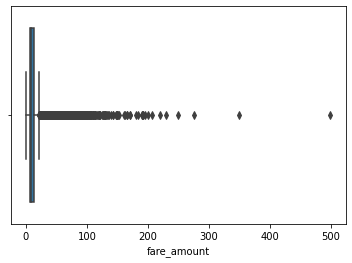

In [49]:
sns.boxplot(x='fare_amount',data=df)

In [50]:
Q1= np.percentile(df['fare_amount'],25,interpolation='midpoint')
Q3= np.percentile(df['fare_amount'],75,interpolation='midpoint')

IQR = Q3-Q1

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

print("Upper=",upper)
print("Lower=",lower)

Upper= 22.25
Lower= -3.75


In [51]:
print("Outliers")
df[(df['fare_amount']<lower) | (df['fare_amount']>upper)][{'fare_amount','day','month','year'}]

Outliers


,day,month,year,fare_amount
6,12,10,2014,24.50
30,21,5,2011,25.70
34,4,6,2014,39.50
39,13,2,2014,29.00
48,3,1,2013,56.80
...,...,...,...,...
199976,18,10,2011,49.70
199977,20,11,2012,43.50
199982,6,8,2014,57.33
199985,18,4,2015,24.00


In [70]:
print("new shape",df.shape)

new shape (182821, 11)


<AxesSubplot:xlabel='fare_amount'>

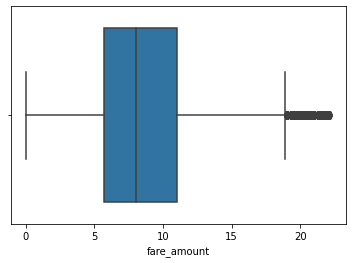

In [71]:
sns.boxplot(x='fare_amount',data=df)

In [72]:
corr_matrix=round(df.corr(),2)
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,weekday,year
fare_amount,1.00,0.00,0.00,-0.00,0.00,0.01,0.01,-0.01,0.03,0.02,0.14
pickup_longitude,0.00,1.00,-0.81,0.84,-0.85,-0.00,0.00,0.00,-0.00,-0.00,0.01
pickup_latitude,0.00,-0.81,1.00,-0.77,0.68,-0.00,-0.01,-0.00,0.00,0.00,-0.01
dropoff_longitude,-0.00,0.84,-0.77,1.00,-0.91,0.00,0.00,0.00,-0.00,-0.00,0.01
dropoff_latitude,0.00,-0.85,0.68,-0.91,1.00,-0.00,-0.01,-0.00,0.00,-0.00,-0.01
passenger_count,0.01,-0.00,-0.00,0.00,-0.00,1.00,0.00,0.02,0.01,0.01,0.00
day,0.01,0.00,-0.01,0.00,-0.01,0.00,1.00,0.01,-0.02,0.01,-0.01
hour,-0.01,0.00,-0.00,0.00,-0.00,0.02,0.01,1.00,-0.00,0.03,0.00
month,0.03,-0.00,0.00,-0.00,0.00,0.01,-0.02,-0.00,1.00,-0.00,-0.12
weekday,0.02,-0.00,0.00,-0.00,-0.00,0.01,0.01,0.03,-0.00,1.00,-0.00


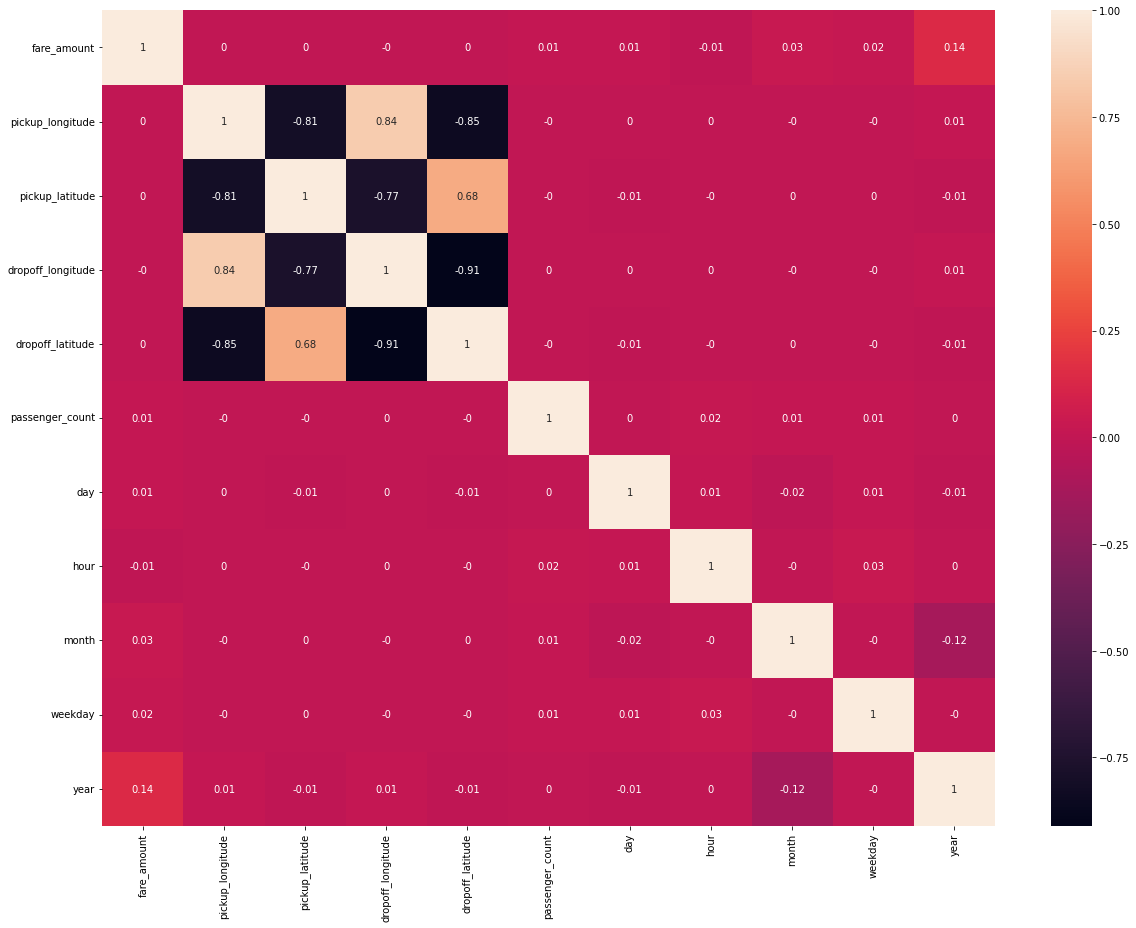

In [73]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [74]:
x=df.drop("fare_amount",axis=1)
y=df['fare_amount']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [76]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,weekday,year
155815,-74.003410,40.751267,-73.999867,40.745835,2,30,22,4,4,2009
27616,-73.974218,40.751765,-73.955965,40.778148,1,12,19,10,3,2011
122768,-73.980811,40.759109,-73.917882,40.754974,1,1,0,3,6,2014
191323,-73.990847,40.750695,-73.994997,40.734060,1,17,18,5,2,2011
62254,-73.987675,40.771227,-73.967665,40.803795,1,24,23,10,5,2014


In [77]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,weekday,year
176146,-73.988240,40.754865,-73.975695,40.759425,6,17,9,7,3,2013
39649,-73.981306,40.724879,-73.996428,40.725486,1,28,16,10,5,2011
83671,-73.958707,40.764050,-73.958707,40.764050,1,18,9,12,3,2013
183922,-73.915300,40.779400,-73.923500,40.761100,1,18,0,6,6,2011
26202,-73.993040,40.727919,-73.977150,40.751498,1,4,17,6,6,2011


In [78]:
x_train.shape

(146256, 10)

In [79]:
x_test.shape

(36565, 10)

In [80]:
ss=preprocessing.StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [81]:
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [82]:
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred=lrmodel.predict(x_test)
df_preds=pd.DataFrame({'Actual: ':y_test,'Predicted: ':y_pred})
df_preds.head(10)

,Actual:,Predicted:
0,9.5,9.586672
1,8.5,8.976306
2,6.0,9.649910
3,9.3,8.938668
4,8.1,8.724896
5,7.7,8.296916
6,7.3,9.116215
7,17.3,8.305642
8,9.7,8.734735
9,9.0,9.738842


In [85]:
print("Regression Coefficients: ",lrmodel.coef_)
print("Intercept :",lrmodel.intercept_)

Regression Coefficients:  [ 0.04681514  0.0342183  -0.02682751 -0.0063804   0.04924538  0.03211746
 -0.06186189  0.17077173  0.09037254  0.58896141]
Intercept : 8.931780234657069


In [89]:
print("Linear regression model: ")
print("MSE: ",mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_absolute_error(y_test,y_pred)))
print('R2 Score: ',metrics.r2_score(y_test,y_pred))


Linear regression model: 
MSE:  16.933564374924288
MAE:  3.2618394062974816
RMSE:  1.806056313157893
R2 Score:  0.019181175931181516


In [90]:
rfrmodel=RandomForestRegressor(n_estimators=10,random_state=1)

In [91]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred=rfrmodel.predict(x_test)